# 剑指offer

### 数组

* 1 在一个长度为n的数组里的所有数字都在0到n-1的范围内。 数组中某些数字是重复的，但不知道有几个数字是重复的。也不知道每个数字重复几次。请找出数组中任意一个重复的数字。 例如，如果输入长度为7的数组{2,3,1,0,2,5,3}

In [2]:
# 解法一：备忘录 时间复杂度O(n) 空间复杂度O(n)
# -*- coding:utf-8 -*-
class Solution:
    # 这里要特别注意~找到任意重复的一个值并赋值到duplication[0]
    # 函数返回True/False
    def duplicate(self, numbers, duplication):
        # write code here
        if len(numbers) == 0:
            return False
        memo = []
        for num in numbers:
            if num in memo:
                duplication[0] = num
                return True
            memo.append(num)
        return False

In [ ]:
# 解法二： 时间复杂度O(nlog(n)) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    # 这里要特别注意~找到任意重复的一个值并赋值到duplication[0]
    # 函数返回True/False
    def duplicate(self, numbers, duplication):
        # write code here
        if len(numbers) == 0:
            return False
        numbers.sort()
        for i in range(len(numbers)-1):
            if numbers[i] == numbers[i+1]:
                duplication[0] = numbers[i]
                return True
        return False

In [1]:
# 解法三： 时间复杂度O(n) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    # 这里要特别注意~找到任意重复的一个值并赋值到duplication[0]
    # 函数返回True/False
    def duplicate(self, numbers, duplication):
        # write code here
        if len(numbers) == 0:
            return False
        for i in range(len(numbers)):
            if i != numbers[i]:
                if numbers[i] == numbers[numbers[i]]:
                    duplication[0] = numbers[i]
                    return True
                else:
                    temp = numbers[i]
                    numbers[i] = numbers[temp]
                    numbers[temp] = temp
        return False

In [2]:
# 解法四： 时间复杂度O(n) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    # 这里要特别注意~找到任意重复的一个值并赋值到duplication[0]
    # 函数返回True/False
    def duplicate(self, numbers, duplication):
        # write code here
        if len(numbers) == 0:
            return False
        length = len(numbers)
        for i in range(length):
            m = numbers[i] - length if numbers[i] >= length else numbers[i]
            if numbers[m] > length:
                duplication[0] = m
                return True
            else:
                numbers[m] += length
        return False

* 2 不修改数组找出重复数字(leetcode 287)

  在一个长度为n+1的数组里的所有数字都在1~n之间，所以数组至少存在一个数字是重复的。请找出数组中任意一个重复的数字，但不能修改输入的数组。
  
> 关联题目 1：leetcode 141(环形链表): 给定一个链表，判断链表中是否有环。

> 关联题目 2：leetcode 142(环形链表 II): 给定一个链表，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。


In [12]:
# 本题解法一   二分查找  时间复杂度O(nlog(n)) 空间复杂度O(1)
class Solution:
    def findDuplicate(self, nums) -> int:
        length = len(nums)
        if length == 0:
            return False
        left, right = 1, length-1
        while(left < right):
            mid = left + (right - left) // 2
            cnt = 0
            for num in nums:
                if num <= mid:
                    cnt += 1
            if cnt > mid:
                right = mid
            else:
                left = mid + 1
        return left

In [11]:
# 本题解法二   时间复杂度O(n) 空间复杂度O(1)
class Solution:
    def findDuplicate(self, nums) -> int:
        length = len(nums)
        if length == 0:
            return False
        slow = 0
        fast = 0
        while True:
            slow = nums[slow]
            fast = nums[nums[fast]]
            if slow == fast:
                before, after = 0, slow
                while before != after:
                    before, after = nums[before], nums[after]
                return before

In [6]:
# 关联题目 1：leetcode 141(环形链表)
# 解法一   时间复杂度O(n) 空间复杂度O(n)
class Solution:
    def hasCycle(self, head) -> bool:
        memo = []
        while head:
            if head in memo:
                return True
            else:
                memo.append(head)
                head = head.next
        return False
# 解法二   时间复杂度O(n) 空间复杂度O(1)
class Solution:
    def hasCycle(self, head) -> bool:
        if not head: return False
        slow = head
        fast = head.next
        while(slow != fast):
            if (not fast) or (not fast.next):
                return False
            slow = slow.next
            fast = fast.next.next
        return True

In [9]:
# 关联题目 2：leetcode 142(环形链表 II)
# 解法一   时间复杂度O(n) 空间复杂度O(n)
class Solution:
    def detectCycle(self, head):
        memo = []
        while head:
            if head in memo:
                return head
            else:
                memo.append(head)
                head = head.next
        return None
# 解法二   时间复杂度O(n) 空间复杂度O(1)
class Solution:
    def detectCycle(self, head):
        slow = head
        fast = head
        while True:
            if (not fast) or (not fast.next):
                return None
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                point = head
                while(point != slow):
                    slow = slow.next
                    point = point.next
                return slow

* 3 在一个二维数组中（每个一维数组的长度相同），每一行都按照从左到右递增的顺序排序，每一列都按照从上到下递增的顺序排序。请完成一个函数，输入这样的一个二维数组和一个整数，判断数组中是否含有该整数。

In [1]:
# 解法一    时间复杂度O(n*m) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    # array 二维列表
    def Find(self, target, array):
        # write code here
        if not array: return False
        m, n = len(array), len(array[0]) 
        for i in range(m):
            for j in range(n):
                if array[i][j] == target:
                    return True
        return False

In [7]:
# 解法二    时间复杂度O(n+m) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    # array 二维列表
    def Find(self, target, array):
        # write code here
        if not array: return False
        M, N = len(array), len(array[0])
        m, n = 0, N-1 
        while ((m < M) and (n >= 0)):
            if array[m][n] == target:
                return True
            elif array[m][n] > target:
                n -= 1
            else:
                m += 1
        return False

* 4 构建乘积数组  给定一个数组A[0,1,...,n-1],请构建一个数组B[0,1,...,n-1],其中B中的元素B[i]=A[0] * A[1] * ... * A[i-1] * A[i+1] * ... * A[n-1]。不能使用除法。

In [9]:
# 解法一    时间复杂度O(n^2) 空间复杂度O(1)
# -*- coding:utf-8 -*-
class Solution:
    def multiply(self, A):
        # write code here
        if not A: return []
        B = []
        for i in range(len(A)):
            res = 1
            for j in range(len(A)):
                if j == i:
                    res = res * 1
                else:
                    res = res * A[j]
            B.append(res)
        return B

In [10]:
# 解法二    时间复杂度O(n) 空间复杂度O(n)
# -*- coding:utf-8 -*-
class Solution:
    def multiply(self, A):
        # write code here
        if not A: return []
        C = [1]
        D = [1]
        for i in range(len(A)-1):
            C.append(C[i] * A[i])
            D.append(D[i] * A[len(A)-i-1])
        return [C[i] * D[len(A)-1-i] for i in range(len(A))]

### 字符串

* 5 替换空格 
   
   请实现一个函数，将一个字符串中的每个空格替换成“%20”。例如，当字符串为We Are Happy.则经过替换之后的字符串为We%20Are%20Happy。

In [11]:
# python 的两种解法
# -*- coding:utf-8 -*-
class Solution:
    # s 源字符串
    def replaceSpace(self, s):
        # write code here
        return s.replace(" ", "%20")
# -*- coding:utf-8 -*-
class Solution:
    # s 源字符串
    def replaceSpace(self, s):
        # write code here
        return "%20".join(s.split(" "))

*  正则表达式匹配（hard）
   
   请实现一个函数用来匹配包括'.'和 * 的正则表达式。模式中的字符 ' .'表示任意一个字符，而 * 表示它前面的字符可以出现任意次（包含0次）。 在本题中，匹配是指字符串的所有字符匹配整个模式。例如，字符串"aaa"与模式"a.a"和"ab * ac * a"匹配，但是与"aa.a"和"ab*a"均不匹配

*  表示数值的字符串（hard）
  
  请实现一个函数用来判断字符串是否表示数值（包括整数和小数）。例如，字符串"+100","5e2","-123","3.1416"和"-1E-16"都表示数值。 但是"12e","1a3.14","1.2.3","+-5"和"12e+4.3"都不是。
  * 数字 0-9
  * 指数 - "e"
  * 正/负号 - "+"/"-"
  * 小数点 - "."
  
  当然，在输入中，这些字符的上下文也很重要。

In [12]:
# 解法一：python偷鸡
# -*- coding:utf-8 -*-
class Solution:
    # s字符串
    def isNumeric(self, s):
        # write code here
        try:
            num = float(s)
            return True
        except:
            return False

*  在字符串 s 中找出第一个只出现一次的字符。如果没有，返回一个单空格。

In [13]:
# 解法一    时间复杂度O(n) 空间复杂度O(n)
class Solution:
    def firstUniqChar(self, s: str) -> int:
        from collections import Counter
        count = Counter(s)
        for c in s:
            if count[c] == 1:
                return c
        return " "
# 不使用Counter
class Solution:
    def firstUniqChar(self, s: str) -> int:
        hash_map = {}
        for c in s:
            hash_map[c] = hash_map.get(c,0) + 1
        for c in s:
            if hash_map[c] == 1:
                return c
        return " "

# 牛客网的字符流
# -*- coding:utf-8 -*-
class Solution:
    # 返回对应char
    def __init__(self):
        self.s = ""
    def FirstAppearingOnce(self):
        # write code here
        s = self.s
        hash_map = {}
        for c in s:
            hash_map[c] = hash_map.get(c,0) + 1
        for c in s:
            if hash_map[c] == 1:
                return c
        return "#"
    def Insert(self, char):
        # write code here
        self.s += char

### 链表

* 6 从尾到头打印链表

  输入一个链表，按链表从尾到头的顺序返回一个ArrayList。
  
  > 关联题目:leetcode 206 (反转链表)

In [1]:
# 解法一    时间复杂度O(n) 空间复杂度O(n)
# 栈
class Solution:
    # 返回从尾部到头部的列表值序列，例如[1,2,3]
    def printListFromTailToHead(self, listNode):
        # write code here
        if not listNode: return[]
        stack = []
        arrayList = []
        node = listNode
        while node:
            stack.append(node.val)
            node = node.next
        while stack:
            arrayList.append(stack.pop())
        return arrayList

In [2]:
# 解法二    时间复杂度O(n) 空间复杂度O(n)
# 递归
class Solution:
    # 返回从尾部到头部的列表值序列，例如[1,2,3]
    def printListFromTailToHead(self, listNode):
        # write code here
        if not listNode: return[]
        arrayList = []
        def get_nextVal(node):
            if node:
                if node.next:
                    get_nextVal(node.next)
                arrayList.append(node.val)
        get_nextVal(listNode)
        return arrayList

In [4]:
# 关联题目 反转链表解法
# 解法一：栈，同上
# 解法二：双指针
class Solution:
    def reverseList(self, head):
        if not head: return None
        pre = None
        cur = head
        while cur:
            temp = cur.next
            cur.next = pre
            pre = cur
            cur = temp
        return pre
# 解法三：递归
class Solution:
    def reverseList(self, head):
        if (not head) or (not head.next):
            return head
        last = self.reverseList(head.next)
        head.next.next = head
        head.next = None
        return last

* 删除链表中重复元素

  在一个排序的链表中，存在重复的结点，请删除该链表中重复的结点，重复的结点不保留，返回链表头指针。 例如，链表1->2->3->3->4->4->5 处理后为 1->2->5

> 关联题目：leetcode83（删除排序链表中的重复元素）：给定一个排序链表，删除所有重复的元素，使得每个元素只出现一次。比如输入: 1->1->2->3->3  输出: 1->2->3

In [1]:
# 关联题目解法
class Solution:
    def deleteDuplicates(self, head):
        cur = head
        while(cur and cur.next):
            if cur.val == cur.next.val:
                cur.next = cur.next.next
            else:
                cur = cur.next
        return head

In [4]:
# 解法一：时间复杂度O（n） 空间复杂度O（n）
# 哈希表
class Solution:
    def deleteDuplication(self, pHead):
        # write code here
        if not pHead or not pHead.next:
            return pHead
        hash_map = {}
        cur = pHead
        while(cur):
            hash_map[cur.val] = hash_map.get(cur.val, 0) + 1
            cur = cur.next
        new_head = ListNode(0)
        tail = new_head
        cur = pHead
        while(cur):
            if hash_map[cur.val] == 1:
                tail.next = ListNode(cur.val)
                tail = tail.next
            cur = cur.next
        return new_head.next

In [2]:
# 解法二：时间复杂度O（n） 空间复杂度O（1）
class Solution:
    def deleteDuplicates(self, head):
        if not head or not head.next:
            return head
        dummy = ListNode(None)
        dummy.next = head
        pre = dummy
        cur = head
        while(cur and cur.next):
            if cur.val != cur.next.val:
                pre = cur
                cur = cur.next
            else:
                while((cur.next) and (cur.val == cur.next.val)):
                    cur = cur.next
                pre.next = cur.next
                cur = cur.next
        return dummy.next

In [3]:
# 解法三：时间复杂度O（n） 空间复杂度O（1）
# 递归
class Solution:
    def deleteDuplicates(self, head):
        if not head: 
            return head
        if head.next and head.val == head.next.val:
            while head.next and head.val == head.next.val:
                head = head.next
            return self.deleteDuplicates(head.next)
        else:
            head.next = self.deleteDuplicates(head.next)
        return head

### 树

* 7 重建二叉树

  输入某二叉树的前序遍历和中序遍历的结果，请重建出该二叉树。假设输入的前序遍历和中序遍历的结果中都不含重复的数字。例如输入前序遍历序列{1,2,4,7,3,5,6,8}和中序遍历序列{4,7,2,1,5,3,8,6}，则重建二叉树并返回。
                      1
                     /  \
                    2    3
                   /    /  \
                  4    5   6
                   \      /
                    7    8

In [3]:
# 解法：
class Solution:
    # 返回构造的TreeNode根节点
    def reConstructBinaryTree(self, pre, tin):
        # write code here
        if not pre:
            return None
        root = TreeNode(pre[0])
        loc = tin.index(pre[0])
        root.left = self.reConstructBinaryTree(pre[1:loc+1], tin[:loc])
        root.right = self.reConstructBinaryTree(pre[loc+1:], tin[loc+1:])
        return root

* 8 二叉树的下一个节点

  给定一个二叉树和其中的一个结点，请找出中序遍历顺序的下一个结点并且返回。注意，树中的结点不仅包含左右子结点，同时包含指向父结点的指针。
  
```
# -*- coding:utf-8 -*-
class TreeLinkNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        self.next = None
```

In [4]:
# 解法：
class Solution:
    def GetNext(self, pNode):
        # write code here
        if not pNode:
            return None
        if pNode.right:
            pNode = pNode.right
            while pNode.left:
                pNode = pNode.left
            return pNode
        while pNode.next:
            if pNode == pNode.next.left:
                return pNode.next
            pNode = pNode.next
        return None

* 对称的二叉树

  请实现一个函数，用来判断一颗二叉树是不是对称的。注意，如果一个二叉树同此二叉树的镜像是同样的，定义其为对称的。
                  
                      1
                    /    \
                   2      2
                  / \     /  \
                 3   4    4   3
  

In [1]:
# 解法一： 时间复杂度O（n） 空间复杂度O（n）
# 递归
class Solution:
    def isSymmetrical(self, pRoot):
        # write code here
        def check(node1, node2):
            if not node1 and not node2:
                return True
            if not node1 or not node2:
                return False
            if node1.val != node2.val:
                return False
            return check(node1.left, node2.right) and check(node1.right, node2.left)
        return check(pRoot, pRoot)

In [2]:
# 解法二： 时间复杂度O（n） 空间复杂度O（n）
# 队列
class Solution:
    def isSymmetrical(self, pRoot):
        # write code here
        if not pRoot or not (pRoot.left or pRoot.right):
            return True
        # 用队列保存节点
        queue = [pRoot.left, pRoot.right]
        while queue:
            # 从队列中取出两个节点，再比较这两个节点
            left = queue.pop(0)
            right = queue.pop(0)
            # 如果两个节点都为空就继续循环，两者有一个为空就返回false
            if not (left or right):
                continue
            if not (left and right):
                return False
            if left.val!=right.val:
                return False
            # 将左节点的左孩子， 右节点的右孩子放入队列
            queue.append(left.left)
            queue.append(right.right)
            # 将左节点的右孩子，右节点的左孩子放入队列
            queue.append(left.right)
            queue.append(right.left)
        return True

* 按之字形顺序打印二叉树

   请实现一个函数按照之字形打印二叉树，即第一行按照从左到右的顺序打印，第二层按照从右至左的顺序打印，第三行按照从左到右的顺序打印，其他行以此类推。

In [1]:
# 解法一  
# 类似于双栈的思想
class Solution:
    def Print(self, pRoot):
        # write code here
        if not pRoot: return []
        res = []
        cur = [pRoot]
        depth = 0
        while cur:
            tmp = []
            next_level = []
            for node in cur:
                tmp.append(node.val)
                if node.left:
                    next_level.append(node.left)
                if node.right:
                    next_level.append(node.right)
            if depth % 2 == 1:
                res.append(tmp[::-1])
            else:
                res.append(tmp)
            depth += 1
            cur = next_level
        return res

In [3]:
# 解法二：递归
class Solution:
    def Print(self, pRoot):
        # write code here
        res = []
        def helper(node, depth):
            if not node: return
            if len(res) == depth:
                res.append([])
            if depth % 2 == 1:
                res[depth].insert(0, node.val)
            else:
                res[depth].append(node.val)
            helper(node.left, depth+1)
            helper(node.right, depth+1)
        helper(pRoot, 0)
        return res

* 把二叉树打印成多行

  从上到下按层打印二叉树，同一层结点从左至右输出。每一层输出一行。

In [1]:
# 解法一 
class Solution:
    # 返回二维列表[[1,2],[4,5]]
    def Print(self, pRoot):
        # write code here
        res = []
        if not pRoot: return res
        cur = [pRoot]
        while cur:
            tmp = []
            next_level = []
            for node in cur:
                tmp.append(node.val)
                if node.left: next_level.append(node.left)
                if node.right: next_level.append(node.right)
            res.append(tmp)
            cur = next_level
        return res

In [2]:
# 解法二  递归
class Solution:
    # 返回二维列表[[1,2],[4,5]]
    def Print(self, pRoot):
        # write code here
        res = []
        depth = 0
        def helper(node, depth):
            if not node: return
            if len(res) == depth:
                res.append([])
            res[depth].append(node.val)
            helper(node.left, depth + 1)
            helper(node.right, depth + 1)
        helper(pRoot, 0)
        return res

* 序列化二叉树

  请实现两个函数，分别用来序列化和反序列化二叉树

  二叉树的序列化是指：把一棵二叉树按照某种遍历方式的结果以某种格式保存为字符串，从而使得内存中建立起来的二叉树可以持久保存。序列化可以基于先序、中序、后序、层序的二叉树遍历方式来进行修改，序列化的结果是一个字符串，序列化时通过 某种符号表示空节点（#），以 ！ 表示一个结点值的结束（value!）。

  二叉树的反序列化是指：根据某种遍历顺序得到的序列化字符串结果str，重构二叉树。
  
  
  > 序列化是将一个数据结构或者对象转换为连续的比特位的操作，进而可以将转换后的数据存储在一个文件或者内存中，同时也可以通过网络传输到另一个计算机环境，采取相反方式重构得到原数据。

  > 请设计一个算法来实现二叉树的序列化与反序列化。这里不限定你的序列 / 反序列化算法执行逻辑，你只需要保证一个二叉树可以被序列化为一个字符串并且将这个字符串反序列化为原始的树结构。


In [1]:
# 解法一：
# 前序
class Solution:
    def Serialize(self, root):
        def helper(node, res):
            if not node:
                res += "# "
            else:
                res += str(node.val) + " "
                res = helper(node.left, res)
                res = helper(node.right, res)
            return res
        s = helper(root, "")
        return s
    
    def Deserialize(self, data):
        if not data: return None
        lis = data.split()
        def helper(lis):
            if len(lis) == 0:
                return None
            val = lis.pop(0)
            root = None
            if val != '#':
                root = TreeNode(int(val))
                root.left = helper(lis)
                root.right = helper(lis)
            return root
        return helper(lis)

In [5]:
# 解法二：
# 层序
class Solution:
    def Serialize(self, root):

        s = ""
        queue = []
        queue.append(root)
        while queue:
            root = queue.pop(0)
            if root:
                s += str(root.val)
                queue.append(root.left)
                queue.append(root.right)
            else:
                s += "#"
            s += " "
        print(s)       
        return s

    def Deserialize(self, data):
        lis = data.split()
        if lis[0] == "#": return None
        root = TreeNode(int(lis[0]))
        queue = [root]
        i = 1
        while queue:
            node = queue.pop(0)
            if node == None:
                continue
            node.left = TreeNode(int(lis[i])) if lis[i] != "#" else None
            node.right = TreeNode(int(lis[i+1])) if lis[i+1] != "#" else None
            i += 2
            queue.append(node.left)
            queue.append(node.right)
        return root

In [3]:
# 解法三：
# 偷鸡
class Solution:
    def Serialize(self, root):
        # write code here
        return root
    def Deserialize(self, s):
        # write code here
        return s

* 二叉搜索树的第k个结点

  给定一棵二叉搜索树，请找出其中的第k小的结点。例如， （5，3，7，2，4，6，8）    中，按结点数值大小顺序第三小结点的值为4。

In [2]:
# 解法一：时间复杂度O（n） 空间复杂度O（n）
# 中序遍历 递归
class Solution:
    # 返回对应节点TreeNode
    def KthNode(self, pRoot, k):
        # write code here 
        res = []
        def helper(node):
            if not node:
                return None
            helper(node.left)
            res.append(node)
            helper(node.right)
        helper(pRoot)
        if k<=0 or k > len(res): return None
        return res[k-1]

In [3]:
# 解法二：
# 中序遍历 栈
class Solution:
    # 返回对应节点TreeNode
    def KthNode(self, pRoot, k):
        # write code here 
        stack = []
        cur = pRoot
        while cur or stack:
            if cur:
                stack.append(cur)
                cur = cur.left
            else:
                if stack:
                    cur = stack.pop()
                else:
                    return None
                k -= 1
                if not k: return cur
                cur = cur.right
        return None

* 数据流中的中位数

  如何得到一个数据流中的中位数？如果从数据流中读出奇数个数值，那么中位数就是所有数值排序之后位于中间的数值。如果从数据流中读出偶数个数值，那么中位数就是所有数值排序之后中间两个数的平均值。我们使用Insert()方法读取数据流，使用GetMedian()方法获取当前读取数据的中位数。

In [7]:
# 解法一：时间复杂度O(nlogn) 空间复杂度O（n）
class MedianFinder:
    def __init__(self):
        """
        initialize your data structure here.
        """
        self.data = []

    def addNum(self, num: int) -> None:
        self.data.append(num)
        self.data.sort()

    def findMedian(self) -> float:
        length = len(self.data)
        if length % 2 == 0:
            return (self.data[length//2-1] + self.data[length//2]) / 2  # py2 / 2.0
        else:
            return self.data[length//2]

In [8]:
# 解法二：时间复杂度O(n) 空间复杂度O（n）
class MedianFinder:
    def __init__(self):
        """
        initialize your data structure here.
        """
        self.data = []

    def addNum(self, num: int) -> None:
        import bisect
        if not self.data: 
            self.data.append(num)
        else:
            bisect.insort(self.data, num)

    def findMedian(self) -> float:
        length = len(self.data)
        if length % 2 == 0:
            return (self.data[length//2-1] + self.data[length//2]) / 2
        else:
            return self.data[length//2]

In [9]:
# 解法三：时间复杂度O(logn) 空间复杂度O（n）
# 堆
class MedianFinder:
    def __init__(self):
        """
        initialize your data structure here.
        """
        self.max_heap = []
        self.min_heap = []

    def addNum(self, num: int) -> None:
        from heapq import heappush, heappop
        if not self.max_heap or num<=(-self.max_heap[0]):
            heappush(self.max_heap, -num)
            if len(self.max_heap) - len(self.min_heap) > 1:
                heappush(self.min_heap, -heappop(self.max_heap))
        else:
            heappush(self.min_heap, num)
            if len(self.max_heap) - len(self.min_heap) < 0:
                heappush(self.max_heap, -heappop(self.min_heap))

    def findMedian(self) -> float:
        if len(self.max_heap) == len(self.min_heap):
            return (-self.max_heap[0] + self.min_heap[0]) / 2
        else:
            return -self.max_heap[0]

In [10]:
# 解法四：时间复杂度O(logn) 空间复杂度O（n）
# 堆2
class MedianFinder:
    def __init__(self):
        """
        initialize your data structure here.
        """
        self.max_heap = []
        self.min_heap = []

    def addNum(self, num: int) -> None:
        from heapq import heappush, heappushpop
        if len(self.max_heap)==len(self.min_heap):
            heappush(self.min_heap, -heappushpop(self.max_heap, -num))
        else:
            heappush(self.max_heap, -heappushpop(self.min_heap, num))

    def findMedian(self) -> float:
        if len(self.max_heap) == len(self.min_heap):
            return (-self.max_heap[0] + self.min_heap[0]) / 2
        else:
            return self.min_heap[0]

## 栈和队列

* 9 用两个栈实现队列

  用两个栈来实现一个队列，完成队列的Push和Pop操作。 队列中的元素为int类型。

In [2]:
# 解法：
# -*- coding:utf-8 -*-
class Solution:
    def __init__(self):
        self.stack1 = []
        self.stack2 = []
    def push(self, node):
        # write code here
        self.stack1.append(node)
    def pop(self):
        # return xx
        if not self.stack1 and not self.stack2: return None
        if not self.stack2:
            while self.stack1:
                self.stack2.append(self.stack1.pop())
        return self.stack2.pop()

* 滑动窗口的最大值 （hard）
  
  给定一个数组和滑动窗口的大小，找出所有滑动窗口里数值的最大值。
  
  例如，如果输入数组{2,3,4,2,6,2,5,1}及滑动窗口的大小3，那么一共存在6个滑动窗口，
  
  他们的最大值分别为{4,4,6,6,6,5}； 
  
  针对数组{2,3,4,2,6,2,5,1}的滑动窗口有以下6个： 
  
  {[2,3,4],2,6,2,5,1}， 
  
  {2,[3,4,2],6,2,5,1}，
  
  {2,3,[4,2,6],2,5,1}， 
  
  {2,3,4,[2,6,2],5,1}， 
  
  {2,3,4,2,[6,2,5],1}，
  
  {2,3,4,2,6,[2,5,1]}

In [3]:
# 解法一：时间复杂度O(N*k) 
class Solution:
    def maxInWindows(self, num, size):
        # write code here
        res = []
        if not size or not num: return res
        num_windows = len(num) - size + 1
        for i in range(num_windows):
            res.append(max(num[i:i+size]))
        return res

In [2]:
# 解法二：时间复杂度O(Nlog(k)
# 最大堆
class Solution:
    def maxSlidingWindow(self, nums, k):
        res = []
        if not k or not nums or k>len(nums): return res
        from heapq import heappush, heappop
        max_heap = []
        for i in range(k):
            heappush(max_heap, -nums[i])
        res.append(-max_heap[0])
        for i in range(1, len(nums)-k+1):
            print(max_heap, nums[i-1])
            heapdelete(max_heap, -nums[i-1])   # 不支持
            heappush(max_heap, -nums[i+k-1])
            res.append(-max_heap[0])
        return res

In [4]:
# 解法三：时间复杂度O(N)
# 双向队列  维护一个单调队列
# -*- coding:utf-8 -*-
class Solution:
    def maxInWindows(self, num, size):
        # write code here
        res = []
        if not size or not num or size > len(num): return res
        from collections import deque
        deq = deque()
        for i in range(size):
            while deq and num[i] >= num[deq[-1]]:
                deq.pop()
            deq.append(i)
        for i in range(size, len(num)):
            res.append(num[deq[0]])
            while deq and num[i] >= num[deq[-1]]:
                deq.pop()
            while deq and deq[0] <= i-size:
                deq.popleft()
            deq.append(i)
        res.append(num[deq[0]])
        return res
    
# 大佬写法
# -*- coding:utf-8 -*-
class Solution:
    def maxInWindows(self, num, size):
        # write code here
        res = []
        if not size or not num or size > len(num): return res
        win, res = [], []
        for i, v in enumerate(num):
            if i >= size and win[0] <= i - size: win.pop(0)
            while win and num[win[-1]] <= v: win.pop()
            win.append(i)
            if i >= size - 1: res.append(num[win[0]])
        return res

In [5]:
# 解法四：时间复杂度O(N)
# 动态规划  分块
class Solution:
    def maxInWindows(self, num, size):
        # write code here
        res = []
        if not size or not num or size > len(num): return res
        
        n = len(num)
        left = [0] * n
        left[0] = num[0]
        right = [0] * n
        right[n - 1] = num[n - 1]
        for i in range(1, n):
            # from left to right
            if i % size == 0:
                # block start
                left[i] = num[i]
            else:
                left[i] = max(left[i - 1], num[i])
            # from right to left
            j = n - i - 1
            if (j + 1) % size == 0:
                # block end
                right[j] = num[j]
            else:
                right[j] = max(right[j + 1], num[j])
        
        output = []
        for i in range(n - size + 1):
            output.append(max(left[i + size - 1], right[i]))
            
        return output

## 递归和循环

* 10 斐波那契数列
  
  大家都知道斐波那契数列，现在要求输入一个整数n，请你输出斐波那契数列的第n项（从0开始，第0项为0）。
  
$
f(i) = 
\begin{cases}
0, & \text{if $n=0$} \\
1, & \text{if $n=1$} \\
f(n-1) + f(n-2), & \text{if $n>1$}
\end{cases}
$


In [4]:
# 解法
class Solution:
    def Fibonacci(self, n):
        # write code here
        if n == 0: return 0
        dp_table = [0 for _ in range(n+1)]
        dp_table[1] = 1
        for i in range(2, n+1):
            dp_table[i] = dp_table[i-1] + dp_table[i-2]
        return dp_table[n]

* 跳台阶

  一只青蛙一次可以跳上1级台阶，也可以跳上2级。求该青蛙跳上一个n级的台阶总共有多少种跳法（先后次序不同算不同的结果）。

In [10]:
# 解法
class Solution:
    def jumpFloor(self, number):
        # write code here
        if number == 1: return 1
        dp_table = [1 for i in range(number+1)]
        dp_table[2] = 2
        for i in range(3, number+1):
            dp_table[i] = dp_table[i-1] + dp_table[i-2]
        return dp_table[number]

* 变态跳台阶

  一只青蛙一次可以跳上1级台阶，也可以跳上2级……它也可以跳上n级。求该青蛙跳上一个n级的台阶总共有多少种跳法。

In [7]:
# 解法一：
# -*- coding:utf-8 -*-
class Solution:
    def jumpFloorII(self, number):
        # write code here
        if number == 1: return 1
        dp_table = [1 for i in range(number+1)]
        for i in range(2, number+1):
            dp_table[i] = 2 * dp_table[i-1]
        return dp_table[number]

In [8]:
# 解法二：
class Solution:
    def jumpFloorII(self, number):
        # write code here
        return 2 ** (number-1)

* 矩形覆盖

  我们可以用2* 1的小矩形横着或者竖着去覆盖更大的矩形。请问用n个2* 1的小矩形无重叠地覆盖一个2* n的大矩形，总共有多少种方法？
  
  比如n=3时，2*3的矩形块有3种覆盖方法：
  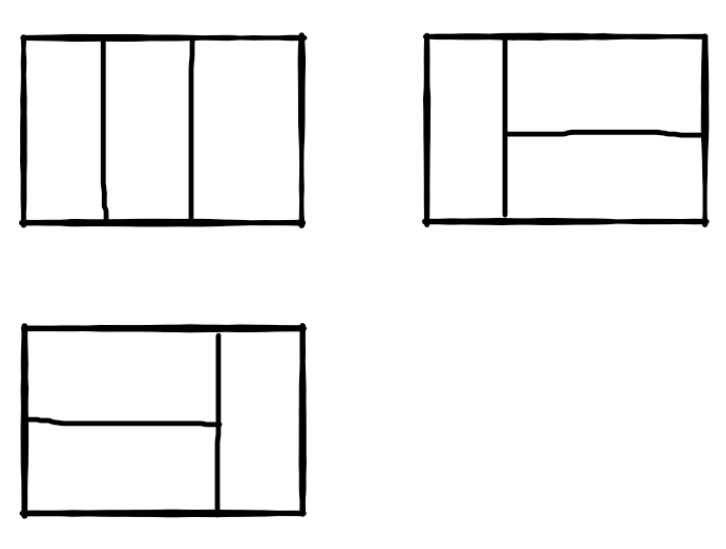

In [9]:
# 解法：
class Solution:
    def rectCover(self, number):
        # write code here
        if number <= 1: return number
        dp_table = [1 for i in range(number+1)]
        dp_table[2] = 2
        for i in range(3, number+1):
            dp_table[i] = dp_table[i-1] + dp_table[i-2]
        return dp_table[number]

## 查找和排序

* 11 旋转数组的最小数字

   把一个数组最开始的若干个元素搬到数组的末尾，我们称之为数组的旋转。输入一个非递减排序的数组的一个旋转，输出旋转数组的最小元素。
   
   例如数组{3,4,5,1,2}为{1,2,3,4,5}的一个旋转，该数组的最小值为1。
   
   NOTE：给出的所有元素都大于0，若数组大小为0，请返回0。

In [2]:
# 解法一：时间复杂度O(N)
# -*- coding:utf-8 -*-
class Solution:
    def minNumberInRotateArray(self, rotateArray):
        # write code here
        if not rotateArray: return 0
        min_num = rotateArray[0]
        for i in rotateArray[1:]:
            if i < min_num: min_num = i
        return min_num

In [4]:
# 解法二：时间复杂度O(log(N))
# 二分查找
# -*- coding:utf-8 -*-
class Solution:
    def minNumberInRotateArray(self, rotateArray):
        # write code here
        if not rotateArray: return 0
        left, right = 0, len(rotateArray) - 1
        while left < right:
            mid = (left + right) >> 1
            if rotateArray[mid] > rotateArray[right]:
                left = left + 1
            else:
                right = mid
        return rotateArray[left]

## 回溯法

* 12 矩阵中的路径

  请设计一个函数，用来判断在一个矩阵中是否存在一条包含某字符串所有字符的路径。路径可以从矩阵中的任意一个格子开始，每一步可以在矩阵中向左，向右，向上，向下移动一个格子。如果一条路径经过了矩阵中的某一个格子，则该路径不能再进入该格子。 例如 

  [a b c e]

  [s f c s]

  [a d e e]

   矩阵中包含一条字符串"bcced"的路径，但是矩阵中不包含"abcb"路径，因为字符串的第一个字符b占据了矩阵中的第一行第二个格子之后，路径不能再次进入该格子。

In [2]:
# 解法：回溯+DFS
# -*- coding:utf-8 -*-
class Solution:
    directions = {(0, 1), (0, -1), (1, 0), (-1, 0)}
    def hasPath(self, matrix, rows, cols, path):
        # write code here
        if not rows: return False
        visited = [[False for _ in range(cols)] for _ in range(rows)]
        for i in range(rows):
            for j in range(cols): 
                if  matrix[i*cols+j] == path[0]:
                    if self.DFS(matrix, i, j, rows, cols, visited, path, 1):
                        return True
        return False
        
    def DFS(self, matrix, i, j, rows, cols, visited, path, k):
        if k == len(path):
            return True
        visited[i][j] = True
        for di, dj in self.directions:
            if 0<=i+di<rows and 0<=j+dj<cols and not visited[i+di][j+dj] and matrix[(i+di)*cols+j+dj] == path[k]:
                if self.DFS(matrix, i+di, j+dj, rows, cols, visited, path, k+1):
                    return True
        visited[i][j] = False
        return False

* 13 机器人的运动范围

  地上有一个m行和n列的方格。一个机器人从坐标0,0的格子开始移动，每一次只能向左，右，上，下四个方向移动一格，但是不能进入行坐标和列坐标的数位之和大于k的格子。 例如，当k为18时，机器人能够进入方格（35,37），因为3+5+3+7 = 18。但是，它不能进入方格（35,38），因为3+5+3+8 = 19。请问该机器人能够达到多少个格子？

In [2]:
# 解法一：回溯+DFS
class Solution:
    directions = {(0, 1), (0, -1), (1, 0), (-1, 0)}
    cnt = 0
    def movingCount(self, threshold, rows, cols):
        # write code here
        if not rows or not cols or threshold<0:
            return 0
        visited = [[False for _ in range(cols)] for _  in range(rows)]
        self.DFS(rows, cols, 0, 0, threshold, visited)
        return self.cnt
    
    def DFS(self, m, n, i, j, k, visited):
        self.cnt += 1
        visited[i][j]=True
        for (di, dj) in self.directions:
            if 0<=i+di<m and 0<=j+dj<n and not visited[i+di][j+dj] and self.get_sum(i+di, j+dj)<=k:
                self.DFS(m, n, i+di, j+dj, k, visited)

    def get_sum(self, i, j):
        return sum(map(int, str(i)+str(j)))

In [3]:
# 解法二：回溯+BFS
# -*- coding:utf-8 -*-
class Solution:
    directions = {(0, 1), (0, -1), (1, 0), (-1, 0)}
    cnt = 0
    def movingCount(self, threshold, rows, cols):
        # write code here
        if not rows or not cols or threshold<0:
            return 0
        visited = [[False for _ in range(cols)] for _  in range(rows)]
        self.BFS(rows, cols, 0, 0, threshold, visited)
        return self.cnt
    
    def BFS(self, m, n, i, j, k, visited):
        visited[i][j]=True
        queue = [(i, j)]
        self.cnt += 1
        while queue:
            i, j = queue.pop(0)
            for di, dj in self.directions:
                if 0<=i+di<m and 0<=j+dj<n and not visited[i+di][j+dj] and self.get_sum(i+di, j+dj)<=k:
                    visited[i+di][j+dj] = True
                    queue.append((i+di, j+dj))
                    self.cnt += 1

    def get_sum(self, i, j):
        return sum(map(int, str(i)+str(j)))

## 动态规划与贪婪算法

* 14 剪绳子

  给你一根长度为n的绳子，请把绳子剪成整数长的m段（m、n都是整数，n>1并且m>1），每段绳子的长度记为k[0],k[1],...,k[m]。请问k[0]xk[1]x...xk[m]可能的最大乘积是多少？例如，当绳子的长度是8时，我们把它剪成长度分别为2、3、3的三段，此时得到的最大乘积是18。
  
  输入描述:
  
  > 输入一个数n，意义见题面。（2 <= n <= 60）
  
  输出描述:
  
  >输出答案。
  

In [2]:
# 解法一：动态规划（动态规划专题中有更详尽描述）
# -*- coding:utf-8 -*-
class Solution:
    def cutRope(self, number):
        # write code here
        if number <= 1: return 0
        if number == 2: return 1
        dp_table = [0 for _ in range(number+1)]
        dp_table[2] = 1
        for i in range(3, number+1):
            for j in range(1, i//2+1):
                dp_table[i] = max(dp_table[i], max((i-j)*j, j*dp_table[i-j]))
        return dp_table[number]

In [4]:
# 解法二：找规律，贪心思想
# -*- coding:utf-8 -*-
class Solution:
    def cutRope(self, number):
        # write code here
        if number < 4: return number - 1
        a, b = number // 3, number % 3
        if b == 0: 
            return math.pow(3, a)
        elif b == 1:
            return math.pow(3, a - 1) * 4
        else: 
            return math.pow(3, a) * 2

> Python 中常见有三种幂计算函数： ** 和 pow() 的时间复杂度均为 O(log a) ；而 math.pow() 始终调用 C 库的 pow() 函数，其执行浮点取幂，时间复杂度为 O(1)。

## 位运算

* 15 二进制中1的个数

输入一个整数，输出该数二进制表示中1的个数。其中负数用补码表示。

In [5]:
# 不正确的解法
# 无符号整数可以
# -*- coding:utf-8 -*-
class Solution:
    def NumberOf1(self, n):
        # write code here
        cnt = 0
        while n:
            if (n&1):
                cnt += 1
            n = n >> 1
        return cnt

In [4]:
# 修正，计数
# -*- coding:utf-8 -*-
class Solution:
    def NumberOf1(self, n):
        # write code here
        return sum([(n>>i & 1) for i in range(0,32)])

In [ ]:
# 解法一： 
# py 不行，py 整形无限大 得计数
class Solution {
public:
     int  NumberOf1(int n) {
         int cnt = 0;
         unsigned int flag = 1;
         while (flag) {
             if(n&flag)
                 cnt++;
             flag = flag << 1;
         }
         return cnt;
     }
};

In [3]:
# 解法一 py
# -*- coding:utf-8 -*-
class Solution:
    def NumberOf1(self, n):
        # write code here
        cnt = 0
        flag = 1
        for _ in range(32):
            if (n&flag):
                cnt += 1
            flag = flag << 1
        return cnt

In [ ]:
# 解法二：
# py 不行 无限大
class Solution {
public:
     int  NumberOf1(int n) {
         int cnt = 0;
         while (n) {
             cnt++;
             n = (n-1) & n;
         }
         return cnt;
     }
};

## 代码的完整性

* 16 数值的整数次方

给定一个double类型的浮点数base和int类型的整数exponent。求base的exponent次方。

保证base和exponent不同时为0

In [3]:
# 解法一：时间复杂度O(n) 
# leetcode超时
# -*- coding:utf-8 -*-
class Solution:
    def Power(self, base, exponent):
        # write code here
        if base==0: return 0
        
        res = 1
        times = -exponent if exponent<0 else exponent
        for i in range(times):
            res *= base
        return 1/res if exponent<0 else res

解法二：时间复杂度O(log(n))

[二进制或二分思想](https://leetcode-cn.com/problems/shu-zhi-de-zheng-shu-ci-fang-lcof/solution/mian-shi-ti-16-shu-zhi-de-zheng-shu-ci-fang-kuai-s/)

In [4]:
# -*- coding:utf-8 -*-
class Solution:
    def Power(self, base, exponent):
        # write code here
        if base==0: return 0
        
        res = 1
        times = -exponent if exponent<0 else exponent
        while times:
            if times&1: 
                res *= base
            base *= base
            times >>= 1
        return 1/res if exponent<0 else res

如果是非负数次幂，可以用动态规划思想

In [5]:
# -*- coding:utf-8 -*-
class Solution:
    def Power(self, base, exponent):
        # write code here
        if exponent==0: return 0
        if exponent==1: return base
        
        result = self.Power(base, exponent>>1);
        result *= result
        if exponent&1:
            result *= base
            
        return result

* 17 打印从1到最大的n位数

输入数字 n，按顺序打印出从 1 到最大的 n 位十进制数。比如输入 3，则打印出 1、2、3 一直到最大的 3 位数 999。

In [3]:
# 解法一：不太符合题意的解法
# 普通写法
class Solution:
    def printNumbers(self, n: int):
        res = []
        upper = math.pow(10, n)
        i=1
        while(i<upper):
            res.append(i)
            i += 1
        return res
# 自己写快速幂算法
class Solution:
    def printNumbers(self, n: int):
        res = []
        max_ = 1
        base = 10
        while n:
            if n&1: 
                max_ *= base
            base *= base
            n >>= 1
        i=1
        while(i<max_):
            res.append(i)
            i += 1
        return res
# 优美的py写法
class Solution:
    def printNumbers(self, n: int) -> List[int]:
        return list(range(1, 10**n))

In [4]:
# 解法二：数字全排列  递归
class Solution:
    def __init__(self):
        self.res = []
    def printNumbers(self, n: int):
        if n==0: return self.res
        nums = ['' for i in range(n)]
        def printNum(nums, index):
            if index == n:
                self.res.append(int(''.join(nums)))
                return None
            for i in range(0, 10):
                nums[index] = str(i)
                printNum(nums, index+1)
        
        for i in range(0, 10):
            nums[0] = str(i)
            printNum(nums, 1)
        return self.res[1:]

In [13]:
# ....解法
class Solution:
    def printNumbers(self, n):
        if n <= 0:
            return
        list_num =["0"]* n
        while Increament(list_num) is False: # 判断时候已经去到最大值了，是的话停止
            PrintNumber(list_num)

    def PrintNumber(number):
        isBegin = False
        for i in range(len(number)):
            if number[i]!="0" and isBegin is False:
                isBegin = True
            if isBegin:
                tmp = ("".join(number[i:]))
                print(tmp)
                break


    def Increament(number):
        isOverFlow = False
        isIncre = 0 # 是够归零进一
        len_num = len(number)
        n = len_num-1# 因为从最后一位开始而不是0位
        while n >= 0:
            nsum = int(number[n])+isIncre
            if n == len_num-1:
                nsum += 1  # 就是最后一位加一
            if nsum == 10:
                if n == 0:
                    isOverFlow = True #  如果是最后的一个9999加一 那说明已经移除  例如 2位 的是 99 再加一就是溢出了
                else:
                    isIncre = 1 # 如果不是那么就前面一位加一,自己变为0
                    number[n] = "0"
            else:
                number[n] = str(nsum)
            n -= 1
        return isOverFlow